## Disease Prediction: statistical learning, deep learning and a complete comparision


### Introduction 

<b>Problem Set</b>: 

In this project, multiple machine learning algorithms, including logistic regression, multiple artificial neural networks and deep learning models with different architectures are used to build a disease diagnosis model. It is a binary classification problem to predict whether or not a patient has a certain unspecified disease.

<b>Dataset</b>: 

Attributes’ information about the dataset (Disease Prediction Training.csv):
- Age: in years
- Gender: male/female
- Height: in unit of cm
- Weight: in unit of kg
- Low Blood Pressure: lower bound of blood pressure measurement
- High Blood Pressure: higher bound of blood pressure measurement
- Cholesterol: three cholesteral levels
- Glucose: three glucose levels
- Smoke: 1/0 regarding if the patient smokes
- Alcohol: 1/0 regarding if the patient drinks alcohol
- Exercise: 1/0 regarding if the patient exercises regularly
- Disease: The binary target variable. Does the patient have the disease?

## Section 0:  Import Libraries and Load Data

### Load packages and data

In [1]:
# import necessary libraries
import pandas as pd
from pandas import DataFrame, Series
import numpy as np

# data formating 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',100)

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read libaries for machine learning model 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score, ShuffleSplit
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from sklearn.pipeline import make_pipeline
from sklearn import model_selection 
from matplotlib.legend_handler import HandlerLine2D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import roc_curve

In [3]:
# read data into a pandas dataframe
test_df = pd.read_csv("Disease Prediction Testing.csv",sep=',')
train_df = pd.read_csv("Disease Prediction Training.csv",sep=',')

### Reading and Displaying Data

#### Testing dataset has 21000 rows and 11 columns, aftering seting the ID column as index.
- Column Labels: Each column label is unique 
- Empty Column: All columns are non-null
- Type of Values: float64(1), int64(7), object(3)

In [4]:
test_df.set_index('ID', inplace=True)
test_df.head(3)

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
ID,,,,,,,,,,,
0,44,female,160,59.0,100,80,high,normal,0,0,1
1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,63,male,168,84.0,120,80,normal,high,0,0,1


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 0 to 20999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  21000 non-null  int64  
 1   Gender               21000 non-null  object 
 2   Height               21000 non-null  int64  
 3   Weight               21000 non-null  float64
 4   High Blood Pressure  21000 non-null  int64  
 5   Low Blood Pressure   21000 non-null  int64  
 6   Cholesterol          21000 non-null  object 
 7   Glucose              21000 non-null  object 
 8   Smoke                21000 non-null  int64  
 9   Alcohol              21000 non-null  int64  
 10  Exercise             21000 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 1.9+ MB


#### Training Dataset has 49,000 rows and 12 columns.
- Column Labels: Each column label is unique 
- Empty Column: All columns are non-null
- Type of Values: float64(1), int64(8), object(3)

In [7]:
train_df.head(3)

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49000 entries, 0 to 48999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  49000 non-null  int64  
 1   Gender               49000 non-null  object 
 2   Height               49000 non-null  int64  
 3   Weight               49000 non-null  float64
 4   High Blood Pressure  49000 non-null  int64  
 5   Low Blood Pressure   49000 non-null  int64  
 6   Cholesterol          49000 non-null  object 
 7   Glucose              49000 non-null  object 
 8   Smoke                49000 non-null  int64  
 9   Alcohol              49000 non-null  int64  
 10  Exercise             49000 non-null  int64  
 11  Disease              49000 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 4.5+ MB


## Section1: Data Preparation

### 1.1 Derive Descriptive Statistics

#### 1.1.1 Distribution of Numeric Variables 
- **The type of variables we have:** Age is a discrete numeric varaible. Height, Weight, High Blood Pressure, and Low Blood Pressure are continous numeric variables. The last four variables - Smoke, Alcohol, Exercise, and Disease have binary values.
- **We have a balanced Dataset:** According to the distribution of the target variable "Disease", the number of cases of with disease and without disease are roughtly the same.
- **Problem1**: Here we notice that blood pressure has negative values, indicating that there are error data in the High Blood Pressure column.
- **Problem2**: The naming of "High Blood Pressure" and "Low Blood Pressure" have spaces.

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49000.0,52.853306,6.763065,29.0,48.0,53.0,58.0,64.0
Height,49000.0,164.366878,8.216637,55.0,159.0,165.0,170.0,207.0
Weight,49000.0,74.190527,14.329934,10.0,65.0,72.0,82.0,200.0
High Blood Pressure,49000.0,128.698939,147.624582,-150.0,120.0,120.0,140.0,14020.0
Low Blood Pressure,49000.0,96.917367,200.368069,0.0,80.0,80.0,90.0,11000.0
Smoke,49000.0,0.088265,0.283683,0.0,0.0,0.0,0.0,1.0
Alcohol,49000.0,0.054245,0.226503,0.0,0.0,0.0,0.0,1.0
Exercise,49000.0,0.803204,0.397581,0.0,1.0,1.0,1.0,1.0
Disease,49000.0,0.499959,0.500005,0.0,0.0,0.0,1.0,1.0


#### We have a balance dataset.

In [10]:
# target variable
print(train_df['Disease'].value_counts(normalize=True, dropna=False))

0    0.500041
1    0.499959
Name: Disease, dtype: float64


In [5]:
# Find all numeric columns 
numeric_cols = train_df.select_dtypes([np.number]).columns

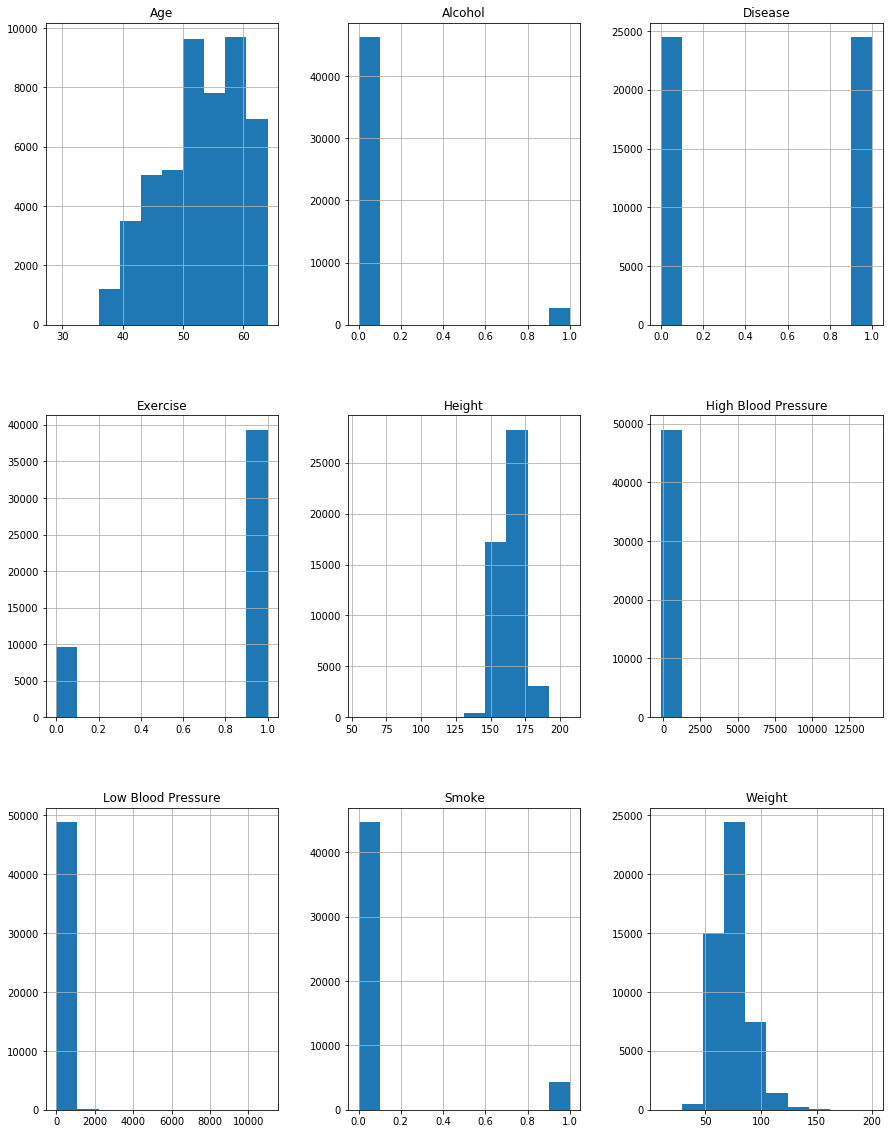

In [12]:
# create histograms
train_df[numeric_cols].hist(figsize=(15,20));

#### 1.1.2 Distribution of Categorical Variables
- Our 3 categorical variables - Gender, Cholesterol, and Glucose don't have 2, 3, and 3 unique values respectively.
- Given the small number of unqie values, we can later apply one-hot encoding to transform them from categorical variables to numeric variables. 

In [6]:
col_obj=[x for x in train_df.columns.to_list() if str(train_df[x].dtype) == 'object']
train_df[col_obj].describe().T

,count,unique,top,freq
Gender,49000,2,female,31863
Cholesterol,49000,3,normal,36676
Glucose,49000,3,normal,41652


In [14]:
print(train_df['Gender'].value_counts(normalize=True, dropna=False))

female    0.650265
male      0.349735
Name: Gender, dtype: float64


In [15]:
print(train_df['Cholesterol'].value_counts(normalize=True, dropna=False))

normal      0.748490
high        0.136837
too high    0.114673
Name: Cholesterol, dtype: float64


In [16]:
print(train_df['Glucose'].value_counts(normalize=True, dropna=False))

normal      0.850041
too high    0.075939
high        0.074020
Name: Glucose, dtype: float64


### 1.2 Potential Data Issues 

#### 1.2.1 Column names
- According to python's naming covention, column names with spaces is recommended be changed. 
- Replace the spaces in "High Blood Pressure" and "Low Blood Pressure" with "_".

In [7]:
# rename the high and low blood pressure column 
train_df.rename(columns={'High Blood Pressure':'High_Blood_Pressure',
                         'Low Blood Pressure':'Low_Blood_Pressure'},inplace=True)

In [18]:
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0


#### 1.2.2 Missing Values
- No missing values are found.

In [19]:
train_df.isnull().sum(axis=0)

Age                    0
Gender                 0
Height                 0
Weight                 0
High_Blood_Pressure    0
Low_Blood_Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

#### 1.2.3 Duplicates
- We delete duplicates becuase they don't provide us addtional information.

In [20]:
if train_df.duplicated().sum()==0:
    print('No duplicated rows')
else:
    print('There are duplicates rows in the dataset.')

There are duplicates rows in the dataset.


In [8]:
train_df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", train_df.shape[0])

Number of rows after removing duplicates: 47248


In [22]:
print("Number of duplicate rows removed:", 49000-train_df.shape[0])

Number of duplicate rows removed: 1752


#### 1.2.3 Data Outliers
- **Do we have outliers?** 
    - Columm High_Blood_Pressure and Low_Blood Pressure have siginificant number of outliers. 
- **Why do we need to take care of outliers here?** 
    - **Logistic Regression is sensitive to outliers:** Like linear regression, estimates of the logistic regression are sensitive to the unusual observations: outliers, high leverage, and influential observations. 
    - **Decision Tree won't be easily affected by outliers**: Decision tree will first split signal data points. After a while when DT can’t extract any information from the signal point that is when DT can’t split signal data point further it will switch to outliers.
    - **Artificial Neural Network can be affected by outliers under certain conditions**: with Relu as activation function, Relu is impacted by outliers if Neural networks are not too deep .When architecture goes deep Relu behave same as other activation functions which even tends to regularize better and converges faster than others. 
- **To sum up, it makes sense to remove the outliers in this dataset.**

In [9]:
numeric_cols = train_df.select_dtypes([np.number]).columns

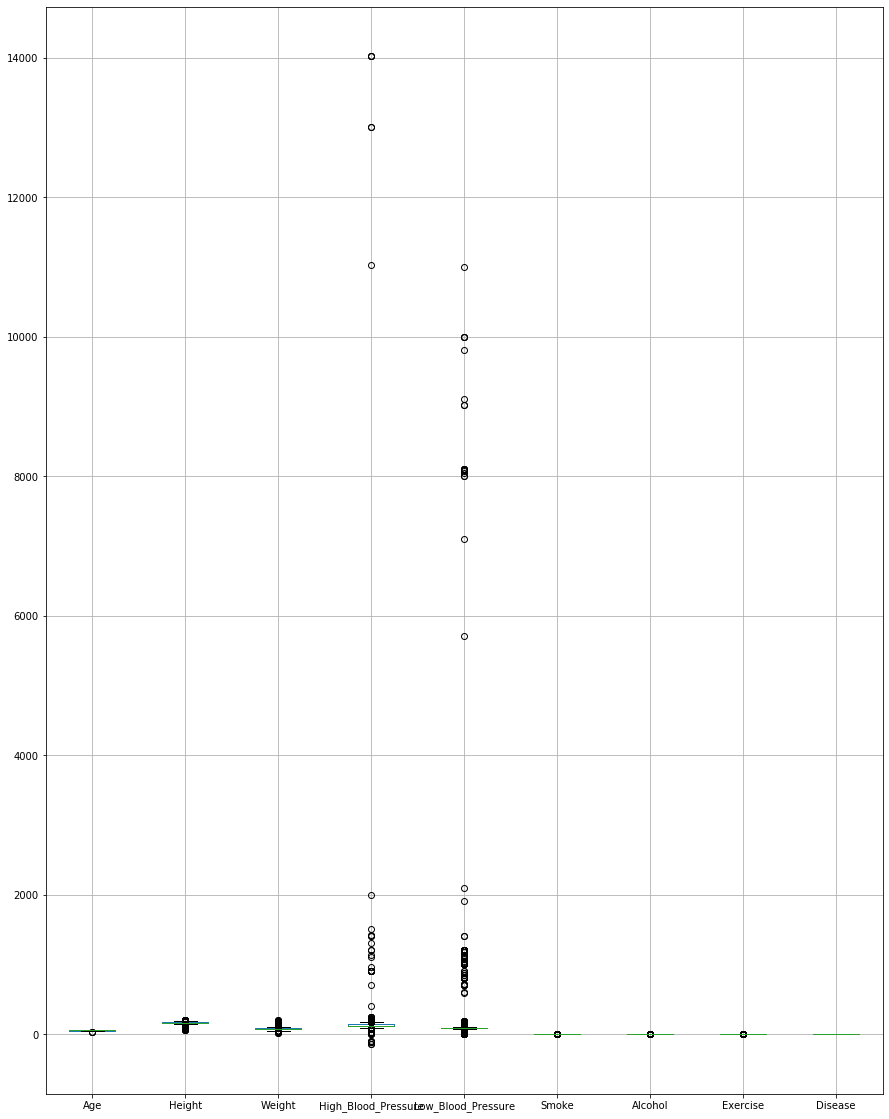

In [24]:
train_df[numeric_cols].boxplot(figsize=(15,20));

In [10]:
outliers_cols = ['Age','Height','Weight','High_Blood_Pressure','Low_Blood_Pressure']
for target_col in outliers_cols:
    '''
    For each numeric column, we use IQR method to identify outliers.
    Column values higher than the upper bound are set to upper bound values.
    Column values lower thatn the lower bound value are set to lower bound values.
    
    '''
    lower_quartile = train_df[target_col].quantile(0.25)
    upper_quartile = train_df[target_col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    # get upper/lower bound
    upper_bound = lower_quartile + outlier_thresh
    lower_bound = lower_quartile - outlier_thresh
    # winsorization
    train_df[target_col].loc[train_df[target_col] > upper_bound] = upper_bound
    train_df[target_col].loc[train_df[target_col] < lower_bound] = lower_bound

/Users/jieerchen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Data Distribution After Altering Outliers

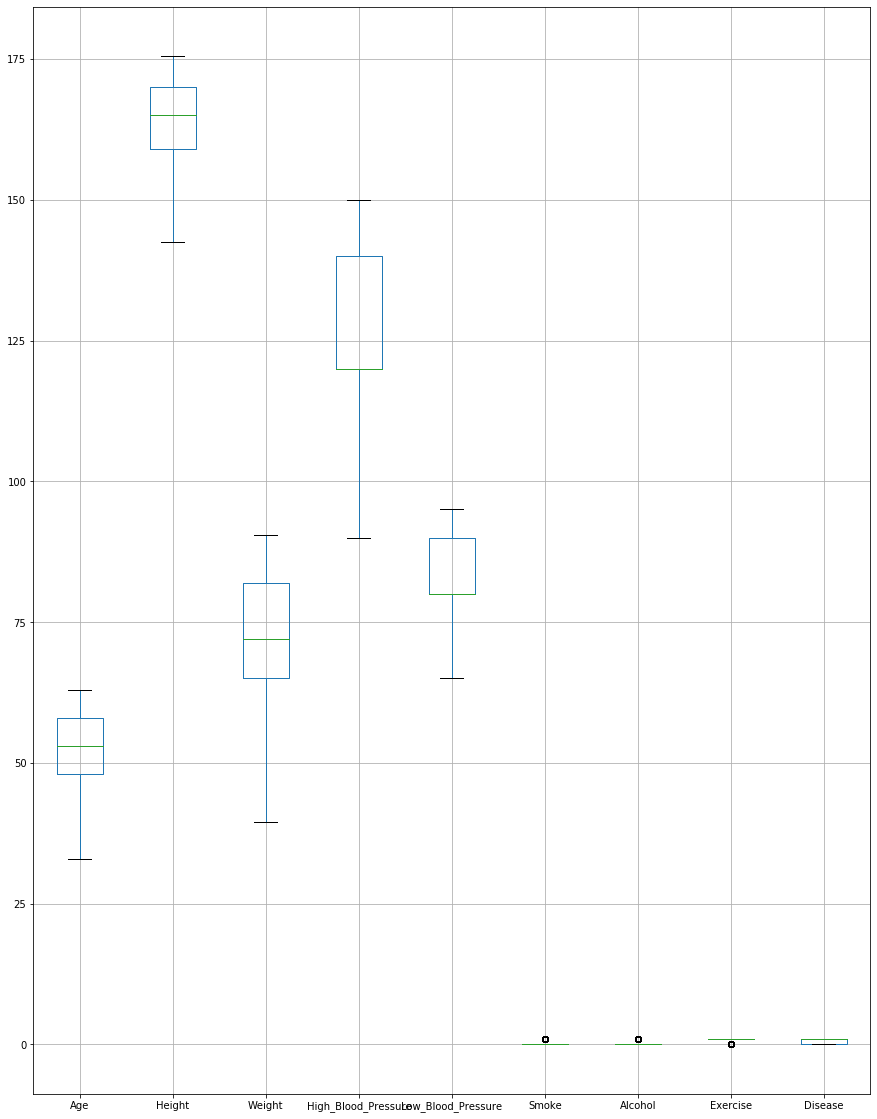

In [26]:
train_df[numeric_cols].boxplot(figsize=(15,20));

#### 1.2.4 Error Data: negative values in High Blood Pressure Column 
- Based on medical knowledge, blood pressure shouldn't have negative values.
- Previously we have 7 rows of negative blood pressure. 
- After taking care of the outliers, we now have no negative blood pressure values.

In [27]:
# number of rows with negative values 
negative_values = sum( n <0 for n in train_df['High_Blood_Pressure'].values.flatten())
print("Number of negatives values in High Blood Pressure Column:", negative_values)

Number of negatives values in High Blood Pressure Column: 0


### 1.4 Data pre-processing and selection

#### 1.4.1 Feture Encoding 

**Categorical Variable Gender**
    - Male:35%, Female: 65%
    - Male --> 0, Female --> 1

In [11]:
# Gender: male & female 
train_df['Gender'] = train_df['Gender'].map({'male': 0, 'female': 1})
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59.0,1,167.0,88.0,130.0,68.0,normal,normal,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,normal,normal,0,0,0,1
2,41.0,1,166.0,83.0,100.0,70.0,normal,normal,0,1,1,0


**Categorical Variable Cholesterol**
- normal: 74.8%, high:13.7%, too high: 11.5%

In [12]:
# one hot encoding 
train_df = pd.get_dummies(train_df, columns=['Cholesterol'])
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Glucose,Smoke,Alcohol,Exercise,Disease,Cholesterol_high,Cholesterol_normal,Cholesterol_too high
0,59.0,1,167.0,88.0,130.0,68.0,normal,0,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,normal,0,0,0,1,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,normal,0,1,1,0,0,1,0


**Categorical Variable Glucose**
- normal: 85%, high: 7,4%, too high:7.59%

In [13]:
# one hot encoding 
train_df = pd.get_dummies(train_df, columns=['Glucose'])
train_df.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Disease,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
0,59.0,1,167.0,88.0,130.0,68.0,0,0,1,0,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,0,0,0,1,0,1,0,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,0,1,1,0,0,1,0,0,1,0


#### 1.4.2 Select features for the modeling. 
- Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm.

In [14]:
# Get target variable
y = train_df['Disease']
y[0:3]

0    0
1    1
2    0
Name: Disease, dtype: int64

In [32]:
# Target variable is balanced
print(y.sum() / y.shape[0] * 100)

50.956654249915346


In [15]:
# Get x variables
X = train_df.drop('Disease',axis=1)
X.head(3)

,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
0,59.0,1,167.0,88.0,130.0,68.0,0,0,1,0,1,0,0,1,0
1,63.0,1,150.0,71.0,140.0,95.0,0,0,0,0,1,0,0,1,0
2,41.0,1,166.0,83.0,100.0,70.0,0,1,1,0,1,0,0,1,0


#### 1.4.3 Normalize the dataset
**Aftering applying MinMaxScaler, our data are range from 0 to 1.**

In [16]:
from sklearn.preprocessing import MinMaxScaler
X = preprocessing.MinMaxScaler().fit(X).transform(X)
X[0:1]

array([[0.86666667, 1.        , 0.74242424, 0.95098039, 0.66666667,
        0.1       , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ]])

#### 1.4.4 Create training and validation dataset

In [17]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=16)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (33073, 15) (33073,)
Test set: (14175, 15) (14175,)


### 1.5 Data Visualization

#### 1.5.1 Correlation Matrix
**Observation:** age(0.24), high blood pressure(0.45) and low blood pressure(0.36) have the highest correlation with the target variable Disease.

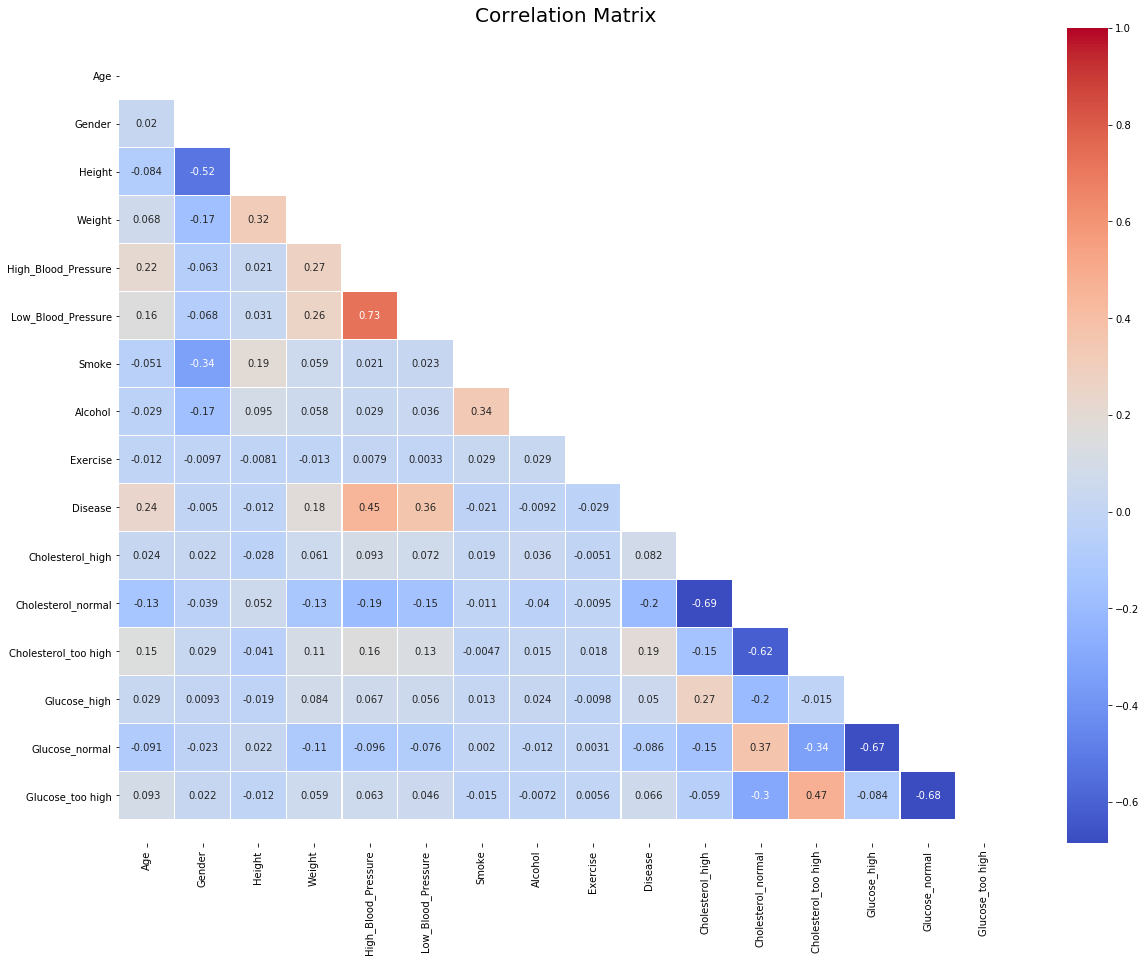

In [36]:
plt.figure(figsize = (20,15))
Matrix = np.triu(train_df.corr())
ax = sns.heatmap(train_df.corr(),  annot = True, fmt='.2g', mask=Matrix, cmap= 'coolwarm', linewidths=.2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix',y=-0.1, fontsize=20);

#### 1.5.2 Plot key columns to understand the data better 

**Observatio:** It seems like people aged over 55 are more likely to be diagnosed with disease.

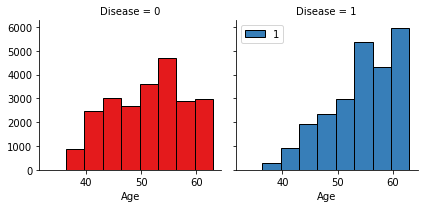

In [37]:
bins = np.linspace(train_df.Age.min(), train_df.Age.max(), 10)
g = sns.FacetGrid(train_df, col="Disease", hue="Disease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

**Observation:** When looking at the effect of age and weight together, it looks like that people weight over 75 and age over 55 have a higher risks of being diagnosed with disease.

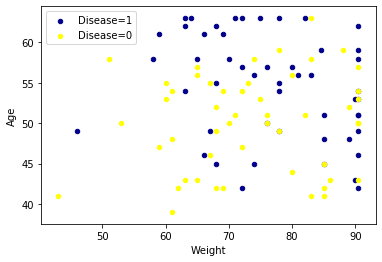

In [38]:
ax = train_df[train_df['Disease'] == 1][0:50].plot(kind='scatter', x='Weight', y='Age', color='DarkBlue', label='Disease=1');
train_df[train_df['Disease'] == 0][0:50].plot(kind='scatter', x='Weight', y='Age', color='Yellow', label='Disease=0', ax=ax);
plt.show()

## Section 2: Build, tune and evaluate various machine learning algorithms

### 2.1 Logistic Regression Model
- Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, y, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables. 
- Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎.

#### 2.1.1 Logistic Regression Training and Testing

In [57]:
logr_pipe = make_pipeline(LogisticRegression(solver='lbfgs'))
logr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [60]:
logr_pred = logr_pipe.predict(X_test)
print(f"RMSE: {round(np.sqrt(metrics.mean_squared_error(y_test, logr_pred)), 3)}")

RMSE: 0.518


In [61]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, logr_pred), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, logr_pred), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, logr_pred), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, logr_pred), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, logr_pred), 4)}")

Accuracy: 0.7315
Precision: 0.7573
Recall: 0.6977
F1-Score: 0.7263
ROC AUC Score: 0.7322


#### 2.1.2 Logistic Regression Model Tunning - Grid Search Cross Validation

**LogisticRegression from Scikit-learn package implements logistic regression**
- Different numerical optimizers 
    - ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 
    - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones
    - ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. 
- Regularization. 
    - Regularization is a technique used to solve the overfitting problem in machine learning models. 
    - L1 Lasso: adds “absolute value of magnitude” of coefficient as penalty term to the loss function.
    - L2 Ridge: adds “squared magnitude” of coefficient as penalty term to the loss function. 
- C parameter: 
    - indicates inverse of regularization strength which must be a positive float. 
    - Smaller values specify stronger regularization.
- max_iter: 
    - Maximum number of iterations taken for the solvers to converge. 
    - If max_iter is set to be too small, the algorithm might not converge. Then the current estimate of the SVM's parameters are not guaranteed to be any good.

 #### The ‘liblinear’ solver supports both L1 and L2 regularization

In [95]:
# l1 lasso 
grid={"C":[0.001,0.01,0.1,1,10,100], 
      "penalty":["l1","l2"],
      'solver':['liblinear'],
      'max_iter':[1000,2000,3000]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.72748193802381


In [108]:
# libraries for log loss
from sklearn.metrics import log_loss

# predict prob
yhat_lr_prob1 = logreg_cv.predict_proba(X_test)
log_loss(y_test, yhat_lr_prob1)

0.5558221259215717

In [111]:
yhat_lr1 = logreg_cv.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_lr1), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_lr1), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_lr1), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_lr1), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_lr1), 4)}")

Accuracy: 0.7314
Precision: 0.7572
Recall: 0.6975
F1-Score: 0.7261
ROC AUC Score: 0.7321


#### The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. 

In [18]:
# l2 ridge
grid2={"C":[0.001,0.01,0.1,1,10,100], 
       "penalty":["l2"],
       'solver':['sag','newton-cg','lbfgs'],
       "max_iter":[1000,2000,3000]}
logreg2 =LogisticRegression()
logreg2_cv=GridSearchCV(logreg2,grid2,cv=10)
logreg2_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg2_cv.best_params_)
print("accuracy :",logreg2_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.7274819106003936


In [109]:
# predict prob
yhat_lr_prob2 = logreg2_cv.predict_proba(X_test)
log_loss(y_test, yhat_lr_prob2)

0.5558402977819954

In [113]:
yhat_lr2 = logreg2_cv.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_lr2), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_lr2), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_lr2), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_lr2), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_lr2), 4)}")

Accuracy: 0.7315
Precision: 0.7573
Recall: 0.6977
F1-Score: 0.7263
ROC AUC Score: 0.7322


#### The ‘saga’ solver supports L1 penalty
- When max_iter was 1000, 2000, and 3000 for sage slover, the function couldn't reach convex. Therefore, the max_iter here is set to be higher the other slovers. 

In [114]:
grid4={"C":[0.001,0.01,0.1,1,100], 
       "penalty":["l1"],
       'solver':['saga'],
       "max_iter":[4000,5000]}
logreg4 =LogisticRegression()
logreg4_cv=GridSearchCV(logreg4,grid4,cv=10)
logreg4_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg4_cv.best_params_)
print("accuracy :",logreg4_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'max_iter': 4000, 'penalty': 'l1', 'solver': 'saga'}
accuracy : 0.7273307344466267


In [115]:
# predict prob
yhat_lr_prob3 = logreg3_cv.predict_proba(X_test)
log_loss(y_test, yhat_lr_prob3)

0.5559029696464873

In [116]:
yhat_lr3 = logreg3_cv.predict(X_test)
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_lr3), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_lr3), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_lr3), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_lr3), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_lr3), 4)}")

Accuracy: 0.7309
Precision: 0.7567
Recall: 0.6971
F1-Score: 0.7257
ROC AUC Score: 0.7317


#### 2.1.3 Slover performance comparision 

**Log Loss**: In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

**"lbgs slover has the best performance"**
- "sage" slover has the worst performance. It has the lowest F1-score, AUC, and log_loss. 
- "lbfgs" slover has slighly better performance. It has better F1-score and AUC. It is log_loss is only 0.00002 higher than that of "libilinear" solver.

In [127]:
lr_performance = {'Metrics': ['Accuracy','Precision','Recall','F1-Score','AUC','log_loss'], 
           'liblinear': [0.7314, 0.7572,0.6975,0.7261,0.7321,0.55582],
           'lbfgs':[0.7315,0.7573,0.6977,0.7263,0.7322,0.55584],
          'saga':[0.7309,0.7567,0.6971,0.7257,0.7317,0.555902]}
lr_performance = pd.DataFrame(data= lr_performance)
lr_performance 

,Metrics,liblinear,lbfgs,saga
0,Accuracy,0.73140,0.73150,0.7309
1,Precision,0.75720,0.75730,0.7567
2,Recall,0.69750,0.69770,0.6971
3,F1-Score,0.72610,0.72630,0.7257
4,AUC,0.73210,0.73220,0.7317
5,log_loss,0.55582,0.55584,0.5559


#### ROC curve for the best Logistic Regression model

predict_proba returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [128]:
# Use predict_proba to get the probability results of Gaussain NB Model
y_pred_logr = logreg2_cv.predict_proba(X_test)[:, 1]
fpr_logr, tpr_logr, thresh = roc_curve(y_test, y_pred_logr)

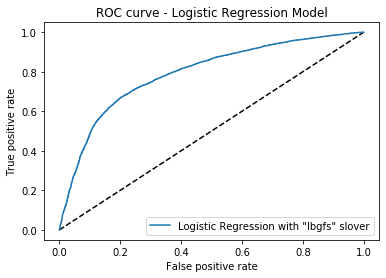

In [129]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logr, tpr_logr, label='Logistic Regression with "lbgfs" slover')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Logistic Regression Model')
plt.legend(loc='best')
plt.show()

### 3.2 Artificial Neural Networks (ANNs) / Deep Learning 

##### The pacakges we used is Keras
- Models in Keras are defined as a sequence of layers. We create a Sequential model and add layers one at a time until we are happy with our network architecture.

In [38]:
from keras.models import Sequential
from keras.layers import Dense 

##### The Arugments that are used for ANN0, ANN1, and ANN2

- **The loss function** to use to evaluate a set of weights. In this case, **we will use cross entropy as the loss argument**. 
    - Cross-entropy is the default loss function to use for binary classification problems.
    - Mathematically, it is the preferred loss function under the inference framework of maximum likelihood. It is the loss function to be evaluated first and only changed if you have a good reason.
    - Cross-entropy will calculate a score that summarizes the average difference between the actual and predicted probability distributions for predicting class 1. The score is minimized and a perfect cross-entropy value is 0.
    
    
- **The optimizer** is used to search through different weights. **We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“.** This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems


- **Metrics:** Finally, because it is a classification problem, we will collect and report the **classification accuracy**, defined via the metrics argument.

##### Hyperparameter Tuning for ANNS / Deep Learning #### 


**1. Tune the number of epochs and batch_size**
- **Epoch**: The training process will run for a fixed number of iterations through the dataset called epochs, that we will specify using the epochs argument. 
- **Batch**: We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.
- Training occurs over epochs and each epoch is split into batches. Each iteration of the training process consists of the following steps:
     1. Calculating the predicted output ŷ, known as feedforward
     2. Updating the weights and biases, known as backpropagation
        
**2. Tune Activation function:** we will use the three most commonly used activation functions. Below are their advantages and disadvantages respectively. 

1. **sigmoid function.**
    - Advantages
         1. Smooth gradient, preventing “jumps” in output values.
         2. Output values bound between 0 and 1, normalizing the output of each neuron.
         3. Clear predictions—For X above 2 or below -2, tends to bring the Y value (the prediction) to the edge of the curve, very close to 1 or 0. This enables clear predictions.
    - Disadvantages
         1. Vanishing gradient—for very high or very low values of X, there is almost no change to the prediction, causing a vanishing gradient problem. This can result in the network refusing to learn further, or being too slow to reach an accurate prediction.
         2. Outputs not zero centered.
         3. Computationally expensive
         
         
2. **TanH / Hyperbolic Tangent**
    - Advantages
         1. Zero centered—making it easier to model inputs that have strongly negative, neutral, and strongly positive values. Otherwise like the Sigmoid function.
    - Disadvantages
        1. Like the Sigmoid function
        
        
3. **ReLU (Rectified Linear Unit)**
    - Advantages
        1. Computationally efficient—allows the network to converge very quickly
        2. Non-linear—although it looks like a linear function, ReLU has a derivative function and allows for backpropagation
    - Disadvantages
        1. The Dying ReLU problem—when inputs approach zero, or are negative, the gradient of the function becomes zero, the network cannot perform backpropagation and cannot learn.
        
        
**3. Tune the number of neurons/hidden nodes for hidden layers**:
   - **The number of hidden nodes and overfitting**:
       - If we have too few hidden units, we will get high training error and high generalization error due to underfitting and high statistical bias. If we have too many hidden units, we may get low training error but still have high generalization error due to overfitting and high variance.
   - **How to choose the number of hidden nodes:**
        - Some books and articles offer "rules of thumb" for choosing an architecture; for example: "A rule of thumb is for the size of this hidden layer to be somewhere between the input layer size ... and the output layer size ..." (Blum, 1992, p. 60). "To calculate the number of hidden nodes we use a general rule of:(Number of inputs + outputs) * (2/3)" (from the FAQ for a commercial neural network software company).
   - **Fllowing these rules, we decided on around 11 hidden nodes to start with for ANN1 layer: (15 inputs + 2 output) * 2/3 = 11.33. 

### 2.2 ANN0: Artificial Neural Network with 0 hidden layer
- The model expects rows of data with 15 variables (the input_dim=15 argument)
- The output layer has one node and uses the sigmoid activation function.

#### Model Tuning: 
- epochs and batch_size


#### Best result:
- 0.731358 using {'batch_size': 3, 'epochs': 14}

In [42]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(1,activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
ann0_model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [1,2,3,4,5,6,7,8,9,10]
epochs = [1,3,5,7,9,10,11,12,13,14,15]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=ann0_model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_test, y_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.731358 using {'batch_size': 3, 'epochs': 14}
0.704622 (0.009040) with: {'batch_size': 1, 'epochs': 1}
0.722257 (0.007957) with: {'batch_size': 1, 'epochs': 3}
0.727055 (0.006189) with: {'batch_size': 1, 'epochs': 5}
0.728255 (0.007461) with: {'batch_size': 1, 'epochs': 7}
0.728819 (0.008381) with: {'batch_size': 1, 'epochs': 9}
0.730795 (0.008010) with: {'batch_size': 1, 'epochs': 10}
0.730794 (0.007673) with: {'batch_size': 1, 'epochs': 11}
0.730301 (0.008543) with: {'batch_size': 1, 'epochs': 12}
0.729948 (0.009443) with: {'batch_size': 1, 'epochs': 13}
0.731147 (0.008346) with: {'batch_size': 1, 'epochs': 14}
0.729877 (0.008598) with: {'batch_size': 1, 'epochs': 15}
0.699895 (0.010190) with: {'batch_size': 2, 'epochs': 1}
0.716684 (0.005468) with: {'batch_size': 2, 'epochs': 3}
0.725503 (0.007024) with: {'batch_size': 2, 'epochs': 5}
0.727125 (0.006440) with: {'batch_size': 2, 'epochs': 7}
0.728254 (0.007325) with: {'batch_size': 2, 'epochs': 9}
0.729665 (0.007477) with: {'b

In [48]:
yhat_ann0 = grid_result.predict(X_test)

In [49]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_ann0), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_ann0), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_ann0), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_ann0), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_ann0), 4)}")

Accuracy: 0.7314
Precision: 0.7667
Recall: 0.6811
F1-Score: 0.7214
ROC AUC Score: 0.7324


### 2.3 ANN1: Artificial Neural Network with 1 hidden layer
- The model expects rows of data with 15 variables (the input_dim=15 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

#### Model Tuning 
-  First Model Tuning: Tune Batch Size and Number of Epochs
-  Second Model Tuning: Tune activation function and neurons with the best Batch Size and Number of Epochs 


#### Best Reuslts: 
- First Model Tuning: 0.733757 using {'batch_size': 2, 'epochs': 10} 
- Second Model Tuning: 0.731994 using {'batch_size': 2, 'epochs': 10, 'activation' = 'relu', neurons = 11}
- Best Parameter set: {'batch_size': 2, 'epochs': 10, 'activation' = 'relu', neurons = 11}

**First Model Tuning**: tune batch size and epochs

In [205]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=15, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
ann1_model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [1, 2, 4, 6, 8]
epochs = [1,5,10,15,20,25]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=ann1_model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X_test, y_test)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.733757 using {'batch_size': 2, 'epochs': 10}
0.714856 (0.033312) with: {'batch_size': 1, 'epochs': 1}
0.729243 (0.010255) with: {'batch_size': 1, 'epochs': 5}
0.729736 (0.011843) with: {'batch_size': 1, 'epochs': 10}
0.733051 (0.007332) with: {'batch_size': 1, 'epochs': 15}
0.729172 (0.011854) with: {'batch_size': 1, 'epochs': 20}
0.729382 (0.007981) with: {'batch_size': 1, 'epochs': 25}
0.719437 (0.011070) with: {'batch_size': 2, 'epochs': 1}
0.728184 (0.010318) with: {'batch_size': 2, 'epochs': 5}
0.733757 (0.009336) with: {'batch_size': 2, 'epochs': 10}
0.730301 (0.010209) with: {'batch_size': 2, 'epochs': 15}
0.728396 (0.010704) with: {'batch_size': 2, 'epochs': 20}
0.730229 (0.011112) with: {'batch_size': 2, 'epochs': 25}
0.715416 (0.009763) with: {'batch_size': 4, 'epochs': 1}
0.728819 (0.010800) with: {'batch_size': 4, 'epochs': 5}
0.730230 (0.006602) with: {'batch_size': 4, 'epochs': 10}
0.729030 (0.007975) with: {'batch_size': 4, 'epochs': 15}
0.729242 (0.009343) with:

#### Second Model Tuning: tune the number of neurons in the hidden layer and the neuron activation function  with 'batch_size' = 2 and 'epochs' = 10

In [87]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(neurons=1,activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=15, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
ann1_model2 = KerasClassifier(build_fn=create_model,batch_size=2,epochs=10,verbose=0)
# define the grid search parameters
activation = ['relu', 'tanh', 'sigmoid']
neurons = [7,8,9,10,11]
param_grid = dict(neurons=neurons,activation=activation)
grid2 = GridSearchCV(estimator=ann1_model2, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result2 = grid2.fit(X_test, y_test)
# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.731994 using {'activation': 'relu', 'neurons': 11}
0.728748 (0.009745) with: {'activation': 'relu', 'neurons': 7}
0.731781 (0.008637) with: {'activation': 'relu', 'neurons': 8}
0.731359 (0.009613) with: {'activation': 'relu', 'neurons': 9}
0.730865 (0.006741) with: {'activation': 'relu', 'neurons': 10}
0.731994 (0.008946) with: {'activation': 'relu', 'neurons': 11}
0.728466 (0.009224) with: {'activation': 'tanh', 'neurons': 7}
0.729877 (0.006859) with: {'activation': 'tanh', 'neurons': 8}
0.731217 (0.006198) with: {'activation': 'tanh', 'neurons': 9}
0.731923 (0.009430) with: {'activation': 'tanh', 'neurons': 10}
0.729525 (0.011947) with: {'activation': 'tanh', 'neurons': 11}
0.730371 (0.006550) with: {'activation': 'sigmoid', 'neurons': 7}
0.730653 (0.006023) with: {'activation': 'sigmoid', 'neurons': 8}
0.727478 (0.009390) with: {'activation': 'sigmoid', 'neurons': 9}
0.730019 (0.009232) with: {'activation': 'sigmoid', 'neurons': 10}
0.728889 (0.005165) with: {'activation': '

#### Make Prediction on the test data using the Best ANN1 model 
1. 'batch_size' = 2 
2. 'epochs' = 10
3.  neurons = 11
4.  activation function for hidden layers = 'relu'
5.  activation function for output layer = 'sigmoid'

In [97]:
# define the model 
model_ann1 = Sequential()
model_ann1.add(Dense(11, input_dim=15, activation='relu'))
model_ann1.add(Dense(1, activation='sigmoid'))
# compile the keras model
model_ann1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_ann1.fit(X_train, y_train,epochs=10,batch_size=2,verbose=0)

In [98]:
yhat_ann1 = model_ann1.predict_classes(X_test)

In [99]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_ann1), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_ann1), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_ann1), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_ann1), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_ann1), 4)}")

Accuracy: 0.7338
Precision: 0.7423
Recall: 0.733
F1-Score: 0.7376
ROC AUC Score: 0.7338


### 2.4 ANN2: Artificial Neural Network with 2 hidden layer


#### 2.4.1 Base Model 
- The model expects rows of data with 15 variables (the input_dim=15 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [184]:
# define the model 
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train,validation_split=0.33,epochs=20,batch_size=1,verbose=0)

#### Evaluate the base model to help us decide the value range for epoch and batch_size for later grid search

- For the accuracy graph, if the model is overfitting the graph will show great performance on the training data and poor performance on the test data.
- When epoch was set to 200, we observed low loss on training dataset and high loss on test dataset. This is a indication of overfitting. Therefore, I adjusted the epoch to 20.

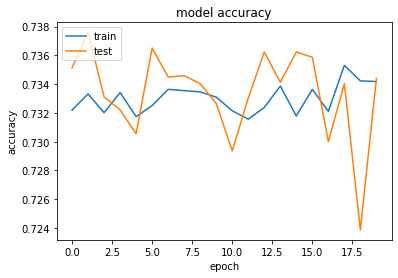

In [196]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

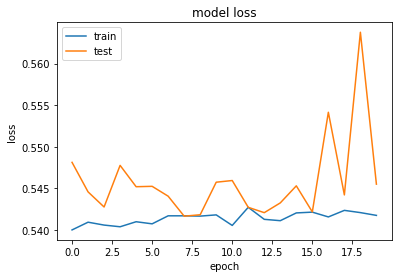

In [197]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [199]:
# evaluate the keras model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

In [200]:
print(loss)
print(accuracy)

0.5480373501777649
0.733615517616272


#### 2.4.2 Grid Search Hyperparameters

#### First Model Tuning: Tune the batch size and number of epochs used when fitting the network. The appropriate trail values for batch size and numbr of epochs are identified from the above two graphs.
- **Best: 0.735380 (0.009572) with: {'batch_size': 4, 'epochs': 20}**

In [204]:
# Use scikit-learn to grid search the batch size and epochs
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=15, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
tune_model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [1, 2, 4, 6, 8]
epochs = [1,5,10,15,20,25]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=tune_model, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.735380 using {'batch_size': 4, 'epochs': 20}
0.724234 (0.007393) with: {'batch_size': 1, 'epochs': 1}
0.726491 (0.010225) with: {'batch_size': 1, 'epochs': 5}
0.730370 (0.005637) with: {'batch_size': 1, 'epochs': 10}
0.732980 (0.010442) with: {'batch_size': 1, 'epochs': 15}
0.724658 (0.013002) with: {'batch_size': 1, 'epochs': 20}
0.729241 (0.007480) with: {'batch_size': 1, 'epochs': 25}
0.725855 (0.007751) with: {'batch_size': 2, 'epochs': 1}
0.725997 (0.012457) with: {'batch_size': 2, 'epochs': 5}
0.732558 (0.010177) with: {'batch_size': 2, 'epochs': 10}
0.729595 (0.011685) with: {'batch_size': 2, 'epochs': 15}
0.732699 (0.010253) with: {'batch_size': 2, 'epochs': 20}
0.731359 (0.009218) with: {'batch_size': 2, 'epochs': 25}
0.717885 (0.011392) with: {'batch_size': 4, 'epochs': 1}
0.726490 (0.010104) with: {'batch_size': 4, 'epochs': 5}
0.729383 (0.009507) with: {'batch_size': 4, 'epochs': 10}
0.731006 (0.006020) with: {'batch_size': 4, 'epochs': 15}
0.735380 (0.009572) with:

#### Second Model Tuning: Tune the number of neurons in the hidden layer with smaller range of batch_size and epochs 
- **Best: 0.734533 (0.010059) with: {'batch_size': 4, 'epochs': 21, 'neurons1': 12, 'neurons2': 9}**

In [104]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(neurons1=1,neurons2=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons1, input_dim=15, activation='relu'))
    model.add(Dense(neurons2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model_ann2 = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [3, 4, 5]
epochs = [19,20,21]
neurons1 = [11,12,13]
neurons2 = [7,8,9]
param_grid = dict(batch_size=batch_size, epochs=epochs, neurons1=neurons1, neurons2=neurons2)
grid3 = GridSearchCV(estimator=model_ann2, param_grid=param_grid, n_jobs=-1, cv=10)
grid_result3 = grid3.fit(X_test, y_test)
# summarize results
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.734533 using {'batch_size': 4, 'epochs': 21, 'neurons1': 12, 'neurons2': 9}
0.731922 (0.009786) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 11, 'neurons2': 7}
0.733192 (0.009326) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 11, 'neurons2': 8}
0.732063 (0.009149) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 11, 'neurons2': 9}
0.729453 (0.007469) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 12, 'neurons2': 7}
0.730723 (0.009180) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 12, 'neurons2': 8}
0.729663 (0.009241) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 12, 'neurons2': 9}
0.728748 (0.010157) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 13, 'neurons2': 7}
0.728819 (0.008056) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 13, 'neurons2': 8}
0.725503 (0.010860) with: {'batch_size': 3, 'epochs': 19, 'neurons1': 13, 'neurons2': 9}
0.729242 (0.011732) with: {'batch_size': 3, 'epochs': 20, 'neurons1': 11, 'neurons2': 7}
0.731147 (0.011142) with: 

#### Model Tuning Result

- **First model tuning result**: 
    - Higher mean accuracy and lower standard deviation
    - Best: 0.735380 (0.009572) with: {'batch_size': 4, 'epochs': 20} neurons: 12 and 8

- **Second model tuning result** 
    - Best: 0.734533 (0.010059) with: {'batch_size': 4, 'epochs': 21, 'neurons1': 12, 'neurons2': 9}
    
- **The ANN2 achieved the best result when**
   1. batch size = 4 
   2. epochs = 20
   3. neurons1 = 12
   4. neurons2 = 8
   5. activation function for hidden layers = relu 
   6. activation function for output layer = sigmoid

In [109]:
# define the model 
model_ann2 = Sequential()
model_ann2.add(Dense(12, input_dim=15, activation='relu'))
model_ann2.add(Dense(8, activation='relu'))
model_ann2.add(Dense(1, activation='sigmoid'))
# compile the keras model
model_ann2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model_ann2.fit(X_train, y_train,epochs=20,batch_size=4,verbose=0)

In [110]:
yhat_ann2 = model_ann2.predict_classes(X_test)

In [111]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, yhat_ann2), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, yhat_ann2), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, yhat_ann2), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test, yhat_ann2), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, yhat_ann2), 4)}")

Accuracy: 0.7362
Precision: 0.7617
Recall: 0.7033
F1-Score: 0.7314
ROC AUC Score: 0.7369


## Section 3: Combination and Comparison of Multiple Machine Learning Algorithms

### 3.1 Decision Tree and Hyperparameter Tuning
##### Hyper-parameters
- **criterion**: Decision tree nodes are split by using impurity. The criterion function measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
- **max_depth**: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Purning helps to aviod overfitting and setting max_depth is an effective way to stop a tree from growing too much and learning the noise in data.
- **min_samples leaf**: min_samples_leaf is also used to control over-fitting by defining that each leaf has more than one element. Thus ensuring that the tree cannot overfit the training dataset by creating a bunch of small branches exclusively for one sample each. 

#### 3.1.1: Explore max_depth
- Build the model and train the model with different max depth ranging from 1 to 10¶
- **Disucssion of overfitting and underfitting**: 
    - If we set max_depth too high, then the decision tree might simply overfit the training data without capturing useful patterns as we would like; this will cause testing error to increase. 
    - If we set it too low, that is not good as well; then we might be giving the decision tree too little flexibility to capture the patterns and interactions in the training data. This will also cause the testing error to increase.
    - There are some nice golden spots in between the extremes of too-high and too-low. As shown below, the optimal max_depth might be around 3 and 9.

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
md = 15
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    #Train Model and Predict  
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.71470899, 0.71470899, 0.72677249, 0.72917108, 0.72994709,
       0.72931217, 0.72634921, 0.72606702, 0.72592593, 0.72162257,
       0.71915344, 0.7124515 , 0.70391534, 0.69869489])

- The mean accuracy is relatively high when the max_depth ranges from 4 to 8. 
- The highest mean is reached when the max_depth is 5.

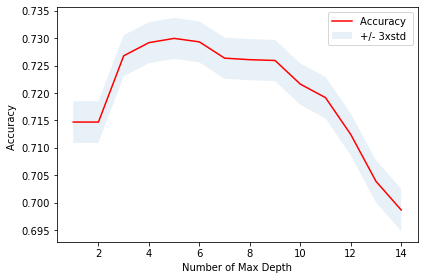

In [134]:
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

#### 3.1.2 Hyperparameter Tuning using Grid Search

In [135]:
dec_tree = DecisionTreeClassifier()
parameters_grid_tree = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20],
              'max_depth': [3,4,5,6,7,8],
              'min_samples_leaf': [1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid_tree = GridSearchCV(dec_tree, parameters_grid_tree, cv=10, scoring='accuracy')
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [136]:
for key, val in grid_tree.best_params_.items():
  print(f"Best hyperparameter is {key}: {val}")

Best hyperparameter is criterion: gini
Best hyperparameter is max_depth: 5
Best hyperparameter is max_leaf_nodes: 20
Best hyperparameter is min_samples_leaf: 1
Best hyperparameter is min_samples_split: 2


In [138]:
# best gradient boosting machine 
best_dt_model = grid_tree.best_estimator_

In [139]:
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
# save the best model for later predictions
best_dt_model_para = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
best_dt_model_para.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 3.1.3 Decision Tree Model Perofrmance 

In [115]:
y_pred_dt = best_dt_model_para.predict(X_test)

In [118]:
print(f"Accuracy: {round(metrics.accuracy_score(y_test, y_pred_dt), 4)}")
print(f"Precision: {round(metrics.precision_score(y_test, y_pred_dt), 4)}")
print(f"Recall: {round(metrics.recall_score(y_test, y_pred_dt), 4)}")
print(f"F1-Score: {round(metrics.f1_score(y_test,y_pred_dt), 4)}")
print(f"ROC AUC Score: {round(metrics.roc_auc_score(y_test, y_pred_dt), 4)}")

Accuracy: 0.7281
Precision: 0.744
Recall: 0.7127
F1-Score: 0.728
ROC AUC Score: 0.7284


#### ROC and AUC for Decision Tree

In [116]:
# Use predict_proba to get the probability results of KNN Model
y_pred_rf = best_dt_model_para.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresh = roc_curve(y_test, y_pred_dt)

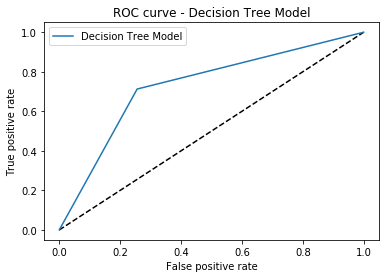

In [117]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Model')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - Decision Tree Model')
plt.legend(loc='best')
plt.show()

#### 3.1.3 Interpretation of Decision Tree Model Perofrmance¶

- **Decision Tree suggests that 3 features are informative, while the remaining are not. These features and their relative importance are**
    1. **High Blood Pressure**: 0.79450391
    2. **Age**: 0.11757271
    3. **Cholesterol_too_high**: 0.06795904

In [149]:
best_dt_model.tree_.compute_feature_importances(normalize=True)

array([0.11757271, 0.        , 0.        , 0.00622831, 0.79450391,
       0.006238  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06795904, 0.        , 0.        , 0.00749803])

Text(0.5, 1.0, 'Decision Tree Feature Importance')

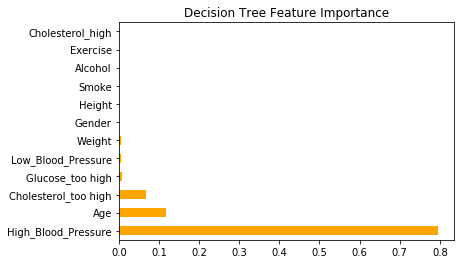

In [154]:
importances = best_dt_model.feature_importances_
feat_importances = pd.Series(best_dt_model.feature_importances_, index=X_index.columns)
feat_importances.nlargest(12).plot(kind='barh',color="orange")
plt.title('Decision Tree Feature Importance')

### 3.2 Models for Comparision: GBM, RF, Logistic Regression

**Conlusion of Comparision**:
- In the section, I listed the most impotrance features identified by GBM, RF, Logistic Regression respectively.  
- According to the result from the best decision tree model, High_Blood_Pressure(0.79), Age(0.12) and Cholesterol too high (0.068) are the 3 most important facotrs in decsioing if a patience was diagnosed with a disease. 
    - This result is generally consitent with the result we got from the GBM model. In the GBM modeel, High blood pressure (0.67), Age (0.13) and Cholesterol too high (0.0488) are also identified as the 3 most important facotrs. The only observable difference is that the importance level of High Blood Pressure in the DT model is higher than that in the GBM model by 0.12.
    - This reusl slightly varies from the result we had from the RF model. Firstly, Besides High Blood Pressure, the RF model aslo identify the low blood pressure as one of the most important factors. High Blood Pressure (around 0.4) ranks 1st and Low Blood Pressure (around 0.21) ranks 2nd. These two factors togheter accounts for around 0.6 in the RF model while the High Blood Pressure from the DT model alone accounts for around 0.8. Secondly, Age and Cholesterol too high rank 3rd and 4th respecitively. Thirdly, the features are less important in the RF model than in the DT model in terms of their percentages.
    - This result is very differnt than the result we have from the Logistic Regression model. The Logsitic regression recognizes 7 significant features. The top 4 are Age, Weight, High_Blood_Pressure, and Low_Blood_Pressure. Only two of them, Age and High_Blood_Pressure are also recognized in the DT model. 

#### 3.2.1 Feature Importance of Gradient Boosting Machine Model 
- **GMB suggests that 4 features are informative, while the remaining are not. These features and their relative importance are**
    1. **High_Blood_Pressure**: 0.673581
    2. **Age**: 0.130931
    3. **Cholesterol_too high**: 0.048845
    4. **Weight**: 0.043179

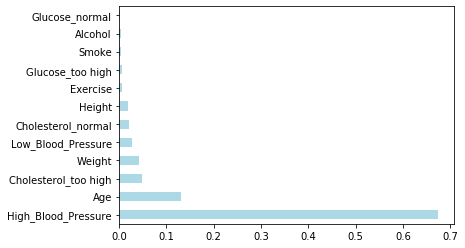

#### 3.2.2 Feature Importance of Random Forest Model
- **RF suggests that 6 features are informative, while the remaining are not. These features and their relative importance are**
    1. **High_Blood_Pressure**: 0.396965
    2. **Low_Blood_Pressure**: 0.210927
    3. **Age**: 0.130146
    4. **Weight**: 0.071704
    5. **Cholesterol_too high**: 0.049116
    6. **Height**: 0.045143

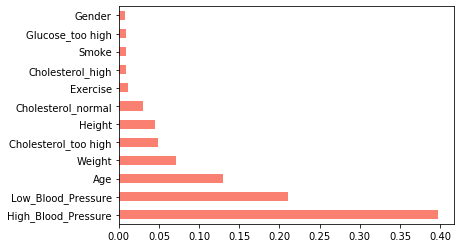

#### 3.2.3 The Model Specification of Logistic Regression
- **Logistic Regression suggests that 7 features are significant. They have p-value <= 0.05. These features and their coefficients importance are** (Coefficient are in log-odds units)
    1. **Age**: 1.5048
    2. **Weight**: 0.6614
    3. **High_Blood_Pressure**: 3.5049
    4. **Low_Blood_Pressure**: 0.6528
    5. **Smoke**: -0.1730
    6. **Alcohol**: -0.2299
    7. **Exercise**: -0.1961

**Use the statsmodels library to have a breakdown of the coefficient results, as well as the associated p-values to determine their significance.**
- Coef. – These are the values for the logistic regression equation for predicting the dependent variable from the independent variable. They are in log-odds units. 
- z and P>|z| – These columns provide the z-value and 2-tailed p-value used in testing the null hypothesis that the coefficient (parameter) is 0. 

In [158]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.555835
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Disease   No. Observations:                33073
Model:                          Logit   Df Residuals:                    33059
Method:                           MLE   Df Model:                           13
Date:                Sun, 22 Nov 2020   Pseudo R-squ.:                  0.1979
Time:                        00:20:18   Log-Likelihood:                -18383.
converged:                       True   LL-Null:                       -22919.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5048      0.059     25.492      0.000       1.389       1.621
x2             0.0304      0.

- Get the column name for features 

In [172]:
# feature 1 - index 0 
X_index.columns[0]

'Age'

In [173]:
# feature 1 - index 0 
X_index.columns[3:9]

Index(['Weight', 'High_Blood_Pressure', 'Low_Blood_Pressure', 'Smoke',
       'Alcohol', 'Exercise'],
      dtype='object')

### 3.4 Master Table of Model Performance 

In [126]:
model_performance = {'Metrics': ['Accuracy','Precision','Recall','F1-Score','ROC_AUC','Parameters','Esitimated Run Time'], 
           'NB-Gussain': [0.6874,0.7367,0.6034,0.6634,0.6892,'Gussain Distribution','< 5 mins'],
           'KNN':[0.7307,0.7592,0.6919,0.724,0.7248,'metric:manhattan, n_neighbors:29, weights:uniform','< 1 hour'],
           'SVM_Linear':[0.7307,0.7592,0.6919,0.724,0.7315,'penalty:l2,C: 0.25','7 hours'],
           'SVM_RBF':[0.7329,0.7688,0.6819,0.7228,0.7340,'C: 0.7,gamma: 0.5','5 hours'],  
           'RF':[0.7356,0.7717,0.6847,0.7256,0.7367,'criterion : entropy,max_depth : 10,max_features : sqrt,n_estimators : 30','<1 hour'],
           'GBM':[0.7369, 0.7579,0.712,0.7343,0.7374,'learning_rate: 0.06,loss: deviance,max_depth: 4,n_estimators: 110,subsample: 0.5','< 30 mins'],
           'DT':[0.7281,0.744,0.7127,0.728,0.7284,'criterion:gini, max_depth:5, max_leaf_nodes:20,min_samples_leaf:1,min_samples_split:2','Less than 1 hour'],         
           'LR':[0.7315,0.7573,0.6977,0.7263,0.7322,'C:1, max_iter:1000, penalty=l2, slover:lbfgs','around 1 hour'],         
           'ANN0':[0.7314,0.7667,0.6811,0.7214,0.7324,'epochs:14, batch_size:3','5 hours'],
           'ANN1':[0.7338,0.7423,0.733,0.7376,0.7338,'epochs:10, batch:2, activation for hidden layer:relu, neurons:11, optimizer=Adam','8 hours'],
           'ANN2':[0.7362,0.7617,0.7033,0.7314,0.7369,'epochs:20 , batch:4 , activation for hidden layers:relu, neurons1:12, neurons2:8, optimizer=Adam','10 hours']}
                   
model_performance = pd.DataFrame(data= model_performance)
model_performance.set_index('Metrics',inplace=True)

In [125]:
model_performance.T

Metrics,Accuracy,Precision,Recall,F1-Score,ROC_AUC,Parameters,Esitimated Run Time
NB-Gussain,0.6874,0.7367,0.6034,0.6634,0.6892,Gussain Distribution,Less than 10 mins
KNN,0.7307,0.7592,0.6919,0.724,0.7248,"metric:manhattan, n_neighbors:29, weights:uniform",Less than 1 hour
SVM_Linear,0.7307,0.7592,0.6919,0.724,0.7315,"penalty:l2,C: 0.25",5 hours
SVM_RBF,0.7329,0.7688,0.6819,0.7228,0.734,"C: 0.7,gamma: 0.5",5 hours
RF,0.7356,0.7717,0.6847,0.7256,0.7367,"criterion : entropy,max_depth : 10,max_features : sqrt,n_estimators : 30",2 hours
GBM,0.7369,0.7579,0.712,0.7343,0.7374,"learning_rate: 0.06,loss: deviance,max_depth: 4,n_estimators: 110,subsample: 0.5",1 hour
DT,0.7281,0.744,0.7127,0.728,0.7284,"criterion:gini, max_depth:5, max_leaf_nodes:20,min_samples_leaf:1,min_samples_split:2",Less than 1 hour
LR,0.7315,0.7573,0.6977,0.7263,0.7322,"C:1, max_iter:1000, penalty=l2, slover:lbfgs",around 1 hour
ANN0,0.7314,0.7667,0.6811,0.7214,0.7324,"epochs:14, batch_size:3",5 hours
ANN1,0.7338,0.7423,0.733,0.7376,0.7338,"epochs:10, batch:2, activation for hidden layer:relu, neurons:11, optimizer=Adam",8 hours


#### Key Metric: F1-Score 
- ***ANN2 has the highest F-1 score 0.7376***.
  

- **We have used Confusion Matrix to gain a comprehensive understanding of model performance. It gives direct comparisons of values like True Positives, False Positives, True Negatives and False Negatives.**
    - In this disease prediction case, we have a balanced training dataset given that Disease = 1 and Disease = 0 accounts for around 50% of the cases respectively. This means that looking at Accuracy score is a fair way to evaluate model performance. 
    - We also need look at the recall score given that doctors want to correctly diagnosed people with disease as having disease as much as possible. 
    - Therefore, we can use F1-Score as our key metric will take both precision and accuracy into consideration. 
- **We have used cross-validation to help us in identifying a case of overfitting when doing model tuning. We have applied cv = 10.**
    - Cross validation is to build an estimator against different cross sections of your data to gain an aggregate understanding of performance across all sections. It estimate the model’s predictive performance on unseen data by repeating the experiment multiple times and using all the different parts of the training set as validation sets. This gives a more accurate indication of how well the model generalizes to unseen data.
- **We haved used ROC curve and AUC score to compare the usefulness of our models.**
    - ROC curves are frequently used to show in a graphical way the connection/trade-off between clinical sensitivity and specificity for every possible cut-off for a test or a combination of tests. As for AUV, AUC is a measure of the usefulness of a test in general, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests.
    - GBM has the highest ROC_AUC score 0.7374, closely followed by that of ANN2 0.7369, and then RF 0.7367.

## Section 4: Prediction and interpretation

### 4.1 Load and Process Testing Data
- The training and testing data should undergo the same data preparation steps or the predictive model will not make sense.

#### Test_df Basic Info

In [20]:
# test_df
print('Number of rows:', test_df.shape[0])
print('Number of columns:', test_df.shape[1])

# rename the high and low blood pressure columns
test_df.rename(columns={'High Blood Pressure':'High_Blood_Pressure',
                         'Low Blood Pressure':'Low_Blood_Pressure'},inplace=True)
# print test_df
test_df.head(3)

Number of rows: 21000
Number of columns: 11


,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
ID,,,,,,,,,,,
0,44,female,160,59.0,100,80,high,normal,0,0,1
1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,63,male,168,84.0,120,80,normal,high,0,0,1


#### Missing values 

In [21]:
# check for missing values 
test_df.isnull().sum(axis=0)

Age                    0
Gender                 0
Height                 0
Weight                 0
High_Blood_Pressure    0
Low_Blood_Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
dtype: int64

#### Duplicates

In [22]:
# check for duplicates 
if test_df.duplicated().sum()==0:
    print('No duplicated rows')
else:
    print('There are duplicates rows in the dataset.')
test_df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", test_df.shape[0])
print("Number of duplicate rows removed:", 21000-test_df.shape[0])

There are duplicates rows in the dataset.
Number of rows after removing duplicates: 20434
Number of duplicate rows removed: 566


#### Outliers

In [23]:
# preprocess outliers 
outliers_cols = ['Age','Height','Weight','High_Blood_Pressure','Low_Blood_Pressure']
for target_col in outliers_cols:
    '''
    For each numeric column, we use IQR method to identify outliers.
    Column values higher than the upper bound are set to upper bound values.
    Column values lower thatn the lower bound value are set to lower bound values.
    
    '''
    lower_quartile = test_df[target_col].quantile(0.25)
    upper_quartile = test_df[target_col].quantile(0.75)
    IQR = upper_quartile - lower_quartile
    outlier_thresh = 1.5 * IQR
    # get upper/lower bound
    upper_bound = lower_quartile + outlier_thresh
    lower_bound = lower_quartile - outlier_thresh
    # winsorization
    test_df[target_col].loc[test_df[target_col] > upper_bound] = upper_bound
    test_df[target_col].loc[test_df[target_col] < lower_bound] = lower_bound


/Users/jieerchen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Negative values 

In [24]:
# number of rows with negative values in High_Blood_Pressure
negative_values = sum( n <0 for n in test_df['High_Blood_Pressure'].values.flatten())
print("Number of negatives values in High Blood Pressure Column:", negative_values)

Number of negatives values in High Blood Pressure Column: 0


#### Feature Encoding 

In [25]:
# categorical variables
test_df['Gender'] = test_df['Gender'].map({'male': 0, 'female': 1})
test_df = pd.get_dummies(test_df, columns=['Cholesterol'])
test_df = pd.get_dummies(test_df, columns=['Glucose'])

#### Ready for Prediction Data

In [26]:
# test_df
print('Number of rows:', test_df.shape[0])
print('Number of columns:', test_df.shape[1])
test_df.head(3)

Number of rows: 20434
Number of columns: 15


,Age,Gender,Height,Weight,High_Blood_Pressure,Low_Blood_Pressure,Smoke,Alcohol,Exercise,Cholesterol_high,Cholesterol_normal,Cholesterol_too high,Glucose_high,Glucose_normal,Glucose_too high
ID,,,,,,,,,,,,,,,
0,44.0,1,160.0,59.0,100.0,80.0,0,0,1,1,0,0,0,1,0
1,41.0,1,169.0,74.0,120.0,70.0,0,0,1,0,1,0,0,1,0
2,63.0,0,168.0,84.0,120.0,80.0,0,0,1,0,1,0,1,0,0


#### Data Scaling 

In [27]:
from sklearn.preprocessing import MinMaxScaler
X_testset = test_df
X_testset = preprocessing.MinMaxScaler().fit(X_testset).transform(X_testset)
X_testset[0:2]

array([[0.36666667, 1.        , 0.53030303, 0.38235294, 0.16666667,
        0.5       , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.26666667, 1.        , 0.8030303 , 0.67647059, 0.5       ,
        0.16666667, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ]])

### 4.2 Make Prediction 

#### Decision Tree

In [35]:
DT = best_dt_model_para.predict(X_testset)
DT[0:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

#### Logistic Regression 

In [28]:
LR = logreg2_cv.predict(X_testset)
LR[0:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

#### ANN0

In [83]:
ANN0 = grid_result.predict(X_testset)
ANN0_list = []
for i in range(len(ANN0)):
    ANN0_list.append(ANN0[i][0])
ANN0_list[0:10]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]

#### ANN1

In [101]:
ANN1 = model_ann1.predict_classes(X_testset)
ANN1_list = []
for i in range(len(ANN1)):
    ANN1_list.append(ANN1[i][0])
ANN1_list[0:10]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]

#### ANN2

In [128]:
ANN2 = model_ann2.predict_classes(X_testset)
ANN2_list = []
for i in range(len(ANN2)):
    ANN2_list.append(ANN2[i][0])
ANN2_list[0:10]

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1]

#### Output prediction result as a CSV file¶

In [132]:
output_df = pd.read_csv('Disease Prediction Testing.csv')
prediction = pd.DataFrame(list(zip(output_df['ID'],DT,LR,ANN0_list,ANN1_list,ANN2_list)),columns=['ID','DT','LR','ANN0','ANN1','ANN2'])
prediction.to_csv('Disease_Prediction_hw4.csv')

In [136]:
prediction.head(15)

,ID,DT,LR,ANN0,ANN1,ANN2
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,1,1,1,1,1
3,3,1,1,1,1,1
4,4,0,0,0,0,0
5,5,1,1,1,1,1
6,6,0,0,0,0,0
7,7,1,1,1,1,1
8,8,1,1,1,1,1
9,9,1,1,1,1,1


### 4.3 Model Interpretation: Decision Tree, Logistic Regression, Artifical Netural Network

#### Decision Tree 

- **Decision Tree suggests that 3 features are informative, while the remaining are not. These features and their relative importance are**
   1. High Blood Pressure: 0.79450391
   2. Age: 0.11757271
   3. Cholesterol_too_high: 0.06795904

- **From the decision tree graph, we learn that the root node is high blood pressure. Since we have previously normalized our data, all values assoiciated with our features are normalized values.** 
   - The first question the decision tree ask is that if normalized high blood pressure is smaller than or euqal to 0.658. 
   - If the answer to this question it is ture, the tree will follow left. Then, it will ask if this patient's age is smaller than or euqal to 0.717. Regardless of the answer, the tree will then ask about the choleterol_too_high feature.  
   - Otherwise, the tree follows right. The tree continues asking if that patience is blood pressure is smaller that 0.808. If yes, the tree proceeds to ask about choleterol_too_high, if not, the tree still ask about the high blood pressure. 

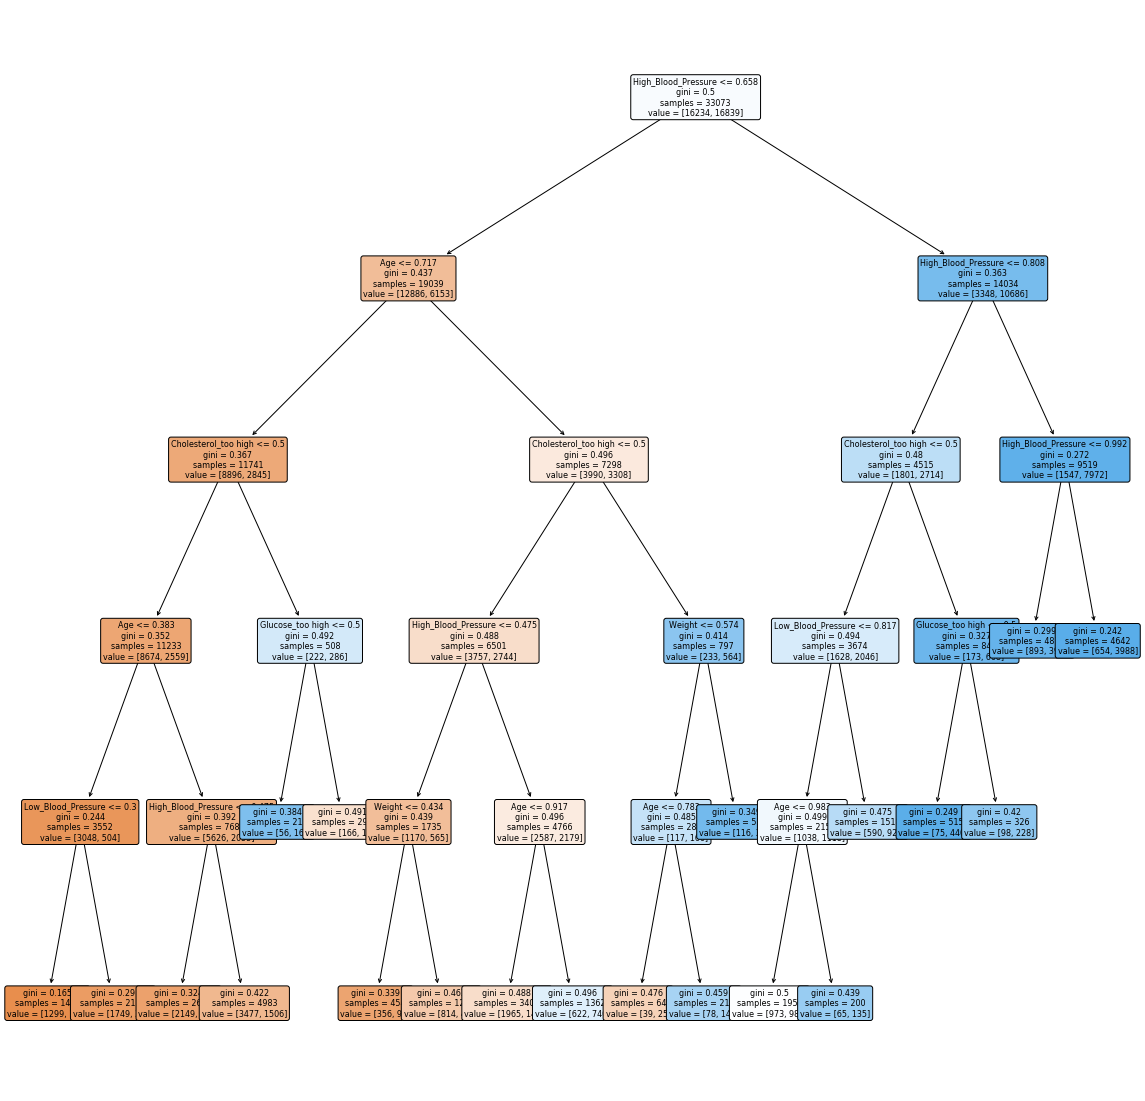

In [216]:
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(best_dt_model, filled=True, rounded=True, feature_names=X_index.columns, fontsize=8)

#### Logistic Regression 

- **In section 3.2.3, we have looked into the model specification such as coefficients and p-value of the logistic regression. According to the summary table, 7 features are significant. Their p-values are <= 0.05. These features and their coefficients importance are** (Note: 
    1. **Age**: 1.5048
    2. **Weight**: 0.6614
    3. **High_Blood_Pressure**: 3.5049
    4. **Low_Blood_Pressure**: 0.6528
    5. **Smoke**: -0.1730
    6. **Alcohol**: -0.2299
    7. **Exercise**: -0.1961
    

- **Intepretation of the coefficients:**
    - For continuous preedictors, the coefficient of a continuous predictor is the estimated change in the natural log of the odds for the reference event for each unit increase in the predictor. 
    - For cateogircal predictors, the coefficient is the estimated change in the natural log of the odds when you change from the reference level to the level of the coefficient.
    - Generally, positive coefficients make the event more likely and negative coefficients make the event less likely. An estimated coefficient near 0 implies that the effect of the predictor is small.
        1. **Age**: a unit change in the Age varaible increases the natrual log of the odds of the envent (being dignosed as having a disease) by 1.5048 
        2. **Weight**: a unit change in the Weight varaible increases the natrual log of the odds of the envent (being dignosed as having a disease) by 0.6614
        3. **High_Blood_Pressure**: a unit change in the High Blood Pressure varaible increases the natrual log of the odds of the envent (being dignosed as having a disease)vt 3.5049
        4. **Low_Blood_Pressure**: a unit change in the Low Blood Pressure varaible increases the natrual log of the odds of the envent (being dignosed as having a disease) by 0.6528.
        5. **Smoke**: a change in the Smoke varaible from not smoke to smoke decrease the natrual log of the odds of the envent (being dignosed as having a disease) by -0.1730.
        6. **Alcohol**: a change in the Alcohol varaible from no drinking alcohol to drinking alcohol decreases the natrual log of the odds of the envent (being dignosed as having a disease) by 0.2299.
        7. **Exercise**: a change in the Exercise varaible from no excercise to exercise decreases the natrual log of the odds of the envent (being dignosed as having a disease) by 0.1961.

#### Artifical Netural Network / Deep Learning 

#### Understanding of Artificial Neural Networks (ANNs) / Deep Learning 
- **Definition:** ANNs with more than one hidden layer are classified as deep-learning and their depth is determined by the exact number of hidden layers.A perceptron is a neural network without any hidden layer. 
- **Structure:** Simply put, an ANN represents interconnected input and output units in which each connection has an associated weight. Neural Networks consist of the following components
    - An input layer, x
    - An arbitrary amount of hidden layers
    - An output layer, ŷ
    - A set of weights and biases between each layer, W and b. 
    - A choice of activation function for each hidden layer, σ.The output at each node is called its activation or node value.  
- **Main machine learning tasks:** When using ANNs, the main task is to determine the number of layers, the number of neurons in each layer, the activation functions, and the epoch values (or reference points of time).
    - **Activation funtion:** ANNs depend highly on activation functions, which allow them to follow a non-linear model and learn data very quickly. The most popular ones that we can choose to implement: sigmoid, ReLu,tanh and Leaky_ReLU
    - **The weights and biaases of a neuron:** The values of a neuron, and therefore the layers of neurons, are determined by the value of the weight and bias of each neuron. In order to determine these values we must look at the gradient descent function.
        - 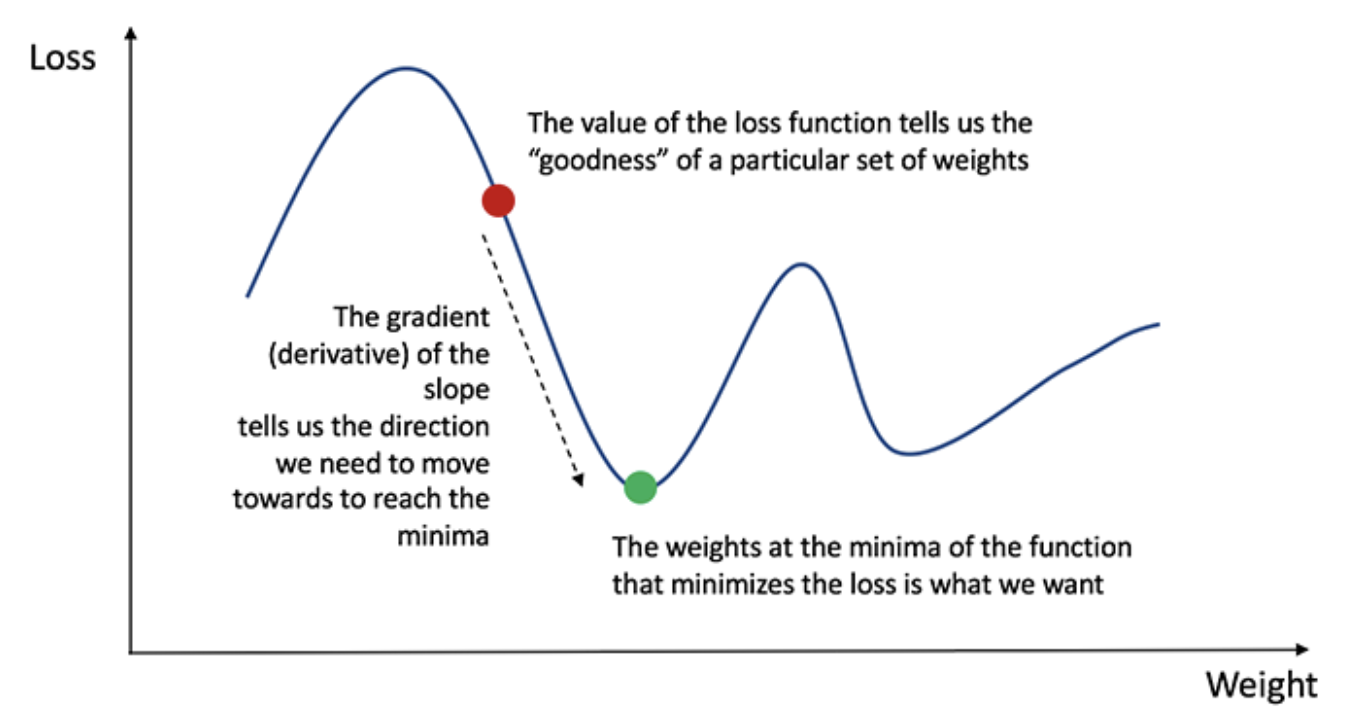

#### Results obtain from the Neural Network

- **Model Accuracy:** The highest model accuracy is ... from ANN2 while the lowest model accuracy is ... from ANN0.. The variation of the model accuracy is noticable but isn't as high as expected. Given that aritifical netural network is also a black box algorithm, we aren't able to intrepretate what varaibles are significant in determing the reuslt of predictions. 


- **Long Model Running Time:** Comapred to other algorithms, training Artifical Neural Network with 10 cross validation took much longer. It is the same for hidden layers equal to 0, 1 or 2. There are severl reasons I can think of for the long running time. 
   - Cross validation is set to be a realtively high value 10 as we did with all other models.
   - Keras package has to be warpped in Scikit-learn in order to do grid search parameter tuning. Sometimes the model threw out the terminiation error and the kernel has to be restarted, leading to some waste of time. More importantly, since this algorithm has high computational cost. Tuning too many parameters at once is not ideal. Therefore, the whole model tuning process is generally broken into serveral steps. For instance, peopel tune epochas and batch size first and then tune the number of neurals. 
  

#### Summary of Findings and Lessions Learned

Overall, among the three models we used in H43, I personally perfer Decesion Tree and Logistic Regression over Artifical Neural Network becauase the first two model allow users to interpretate the results and make implications. 


Combined with the findings from HW3, I discover that KNN and Random Forest Model significantly improves the model accuracy. Even though KNN is a realtively simple supervised learning model, it effectively imporves the accuracy of the model from 0.69 to 0.73. Likewise, Random Forest also increases the accuracy by around 0.035 (or 3.5%). For me, one of the advantages of these two models is that they don't take as much as run time as the sophisticated models like Support Vector Machine and Artifical Neural Network, but they can still achieve decent performance.**

It is also very important to explore and study the raw data, as comfirmed by the performance of our Navie Bayes Models. When using differnt distributions, the difference of base model accuacry can be as large as 0.1 (or 10%). This also taught me that for models that provides differnt mathematical functions, it is essential to undersantd what assumptions they are making about our data in order for us to choose the most apporiate one. 